In [1]:
import numpy as np
import pandas as pd
import pickle
import json

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_curve,roc_auc_score

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

## Define Problem Statement

In [ ]:
To check whether paitient having Diabetes or Not

## Data Gathering 

In [3]:
df=pd.read_csv("diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


## EDA

## A. Understand Our Data

In [4]:
### How big is our data is

In [5]:
df.shape

(768, 9)

In [ ]:
### Get Overview of data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
### Check for missing values

In [6]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
### Check for Duplicate data

In [7]:
df.duplicated().sum()

0

In [ ]:
### How data looks mathematically

In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
### Check for co-relationb between features

In [8]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<AxesSubplot:>

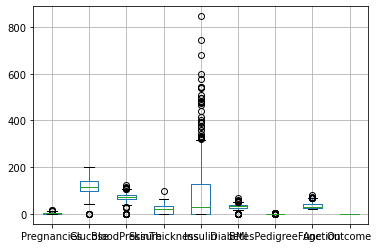

In [6]:
df.boxplot()

In [7]:
num=df.iloc[:,:-1]
num

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [8]:
q1=df["Glucose"].quantile(.25)
q2=df["Glucose"].quantile(.75)
iqr=q2-q1

In [9]:
upper=q2+1.5*iqr
lower=q1-1.5*iqr

In [10]:
df["Glucose"]=df["Glucose"].loc[(df["Glucose"]<upper)|(df["Glucose"]>lower)]

In [11]:
df["Glucose"].describe()

count    768.000000
mean     120.894531
std       31.972618
min        0.000000
25%       99.000000
50%      117.000000
75%      140.250000
max      199.000000
Name: Glucose, dtype: float64

In [12]:
q1=df["Insulin"].quantile(.25)
q2=df["Insulin"].quantile(.75)
iqr=q2-q1
upper=q2+1.5*iqr
lower=q1-1.5*iqr
df["Insulin"]=df["Insulin"].loc[(df["Insulin"]<upper)|(df["Insulin"]>lower)]

In [13]:
df["Insulin"].describe()

count    768.000000
mean      79.799479
std      115.244002
min        0.000000
25%        0.000000
50%       30.500000
75%      127.250000
max      846.000000
Name: Insulin, dtype: float64

In [14]:
for i in num:
    print(i)
    q1 = num[i].quantile(0.25)
    q2 = num[i].quantile(0.50)
    q3 = num[i].quantile(0.75)
    IQR = q3-q1
    uppertail = q3+1.5*IQR
    print(uppertail)
    lowertail = q1-1.5*IQR
    print(lowertail)
    print()
    df[i]=df[i].loc[(df[i]<uppertail)|(df[i]>lowertail)]
    
    

Pregnancies
13.5
-6.5

Glucose
202.125
37.125

BloodPressure
107.0
35.0

SkinThickness
80.0
-48.0

Insulin
318.125
-190.875

BMI
50.550000000000004
13.35

DiabetesPedigreeFunction
1.2
-0.32999999999999996

Age
66.5
-1.5



In [15]:
x = df.drop('Outcome', axis=1)
y = df['Outcome'] 

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=5, stratify=y)

In [16]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

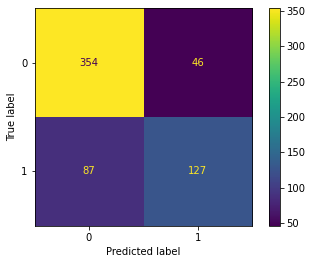

In [17]:
# Training Data #
plot_confusion_matrix(model, x_train, y_train)

In [18]:
# Training Accuracy
model.score(x_train, y_train)

0.7833876221498371

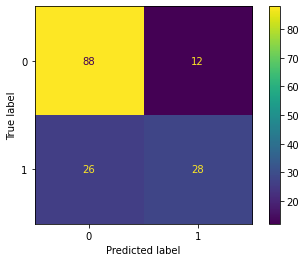

In [19]:
# Testing Data #
plot_confusion_matrix(model, x_test, y_test)

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [53]:
print("Precision = ",precision_score(y_test,y_pred_test))
print("Recall = ",recall_score(y_test,y_pred_test))
print("F1 score = ",f1_score(y_test,y_pred_test))

Precision =  0.7
Recall =  0.5185185185185185
F1 score =  0.5957446808510639


In [20]:
# Training data

#### prediction ####
y_pred_train = model.predict(x_train)

cnf_mtx = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix:\n",cnf_mtx)

#### Visualization ####
print()
accuracy = accuracy_score(y_train, y_pred_train)
print("Accuracy Score:",accuracy)
print()

clsf_report = classification_report(y_train, y_pred_train)
print("Classification report:\n",clsf_report)

Confusion Matrix:
 [[354  46]
 [ 87 127]]

Accuracy Score: 0.7833876221498371

Classification report:
               precision    recall  f1-score   support

           0       0.80      0.89      0.84       400
           1       0.73      0.59      0.66       214

    accuracy                           0.78       614
   macro avg       0.77      0.74      0.75       614
weighted avg       0.78      0.78      0.78       614



In [52]:
# testing data

#### prediction ####
y_pred_test = model.predict(x_test)

cnf_mtx = confusion_matrix(y_test, y_pred_test)
print("Confusion Matrix:\n",cnf_mtx)

#### Visualization ####
print()
accuracy = accuracy_score(y_test, y_pred_test)
print("Accuracy Score:",accuracy)
print()

clsf_report = classification_report(y_test, y_pred_test)
print("Classification report:\n",clsf_report)

Confusion Matrix:
 [[88 12]
 [26 28]]

Accuracy Score: 0.7532467532467533

Classification report:
               precision    recall  f1-score   support

           0       0.77      0.88      0.82       100
           1       0.70      0.52      0.60        54

    accuracy                           0.75       154
   macro avg       0.74      0.70      0.71       154
weighted avg       0.75      0.75      0.74       154



In [54]:
print("Precision = ",precision_score(y_test,y_pred_test))
print("Recall = ",recall_score(y_test,y_pred_test))
print("F1 score = ",f1_score(y_test,y_pred_test))

Precision =  0.7
Recall =  0.5185185185185185
F1 score =  0.5957446808510639


In [21]:
### Prediction for single data


In [29]:
column_names=x.columns
column_names

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [28]:
array = np.zeros(len(column_names), dtype = float)
array

array([0., 0., 0., 0., 0., 0., 0., 0.])

In [33]:
x_test.iloc[5]

Pregnancies                   7.000
Glucose                     142.000
BloodPressure                60.000
SkinThickness                33.000
Insulin                     190.000
BMI                          28.800
DiabetesPedigreeFunction      0.687
Age                          61.000
Name: 223, dtype: float64

In [34]:
Pregnancies=7.000
Glucose=142.000
BloodPressure=60.000
SkinThickness=33.000
Insulin=190.000
BMI=28.800
DiabetesPedigreeFunction=0.687
Age=61.000


In [38]:
array[0] = Pregnancies
array[1] = Glucose
array[2] = BloodPressure
array[3] = SkinThickness
array[4] = Insulin
array[5] = BMI
array[6] = DiabetesPedigreeFunction
array[7] = Age

predict_patient= model.predict([array])[0]
predict_patient
if predict_patient == 1 :
    print("You are Diabetis patient,Take proper treatment and get recover soon")
else:
    print("You dont have diabetis ...Enjoy your life")

You are Diabetis patient,Take proper treatment and get recover soon


In [ ]:
### AOC - ROC 

In [39]:
# prediction probability
y_pred_proba = model.predict_proba(x_train)

y_pred_proba[:,1]  # We are getting class 1 probability

fpr, tpr, thresh = roc_curve(y_train, y_pred_proba[:,1])
thresh

array([1.97505542e+00, 9.75055416e-01, 9.74817990e-01, 9.17615206e-01,
       9.17134981e-01, 9.14927976e-01, 9.06862417e-01, 8.90175663e-01,
       8.87872312e-01, 8.26061297e-01, 8.24003814e-01, 8.12812199e-01,
       8.12153263e-01, 8.10847283e-01, 8.08233383e-01, 7.98877756e-01,
       7.98378710e-01, 7.83208851e-01, 7.81156807e-01, 7.64727770e-01,
       7.59221582e-01, 7.57440841e-01, 7.57196270e-01, 7.42312695e-01,
       7.38333568e-01, 7.34373132e-01, 7.33170763e-01, 7.25279070e-01,
       7.24740781e-01, 7.19939982e-01, 7.19188921e-01, 7.10443199e-01,
       6.98687435e-01, 6.94405175e-01, 6.91975182e-01, 6.87522291e-01,
       6.83322036e-01, 6.71831992e-01, 6.62802293e-01, 6.62564921e-01,
       6.60604213e-01, 6.55641102e-01, 6.54579947e-01, 6.50667403e-01,
       6.47853504e-01, 6.46119761e-01, 6.44852763e-01, 6.22280708e-01,
       6.20803816e-01, 6.06570036e-01, 6.00636414e-01, 6.00238474e-01,
       5.96664744e-01, 5.69733925e-01, 5.68392936e-01, 5.68064785e-01,
      

Text(0.5, 1.0, 'Reciever Operating Characteristics')

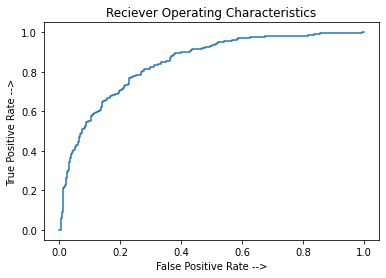

In [40]:
# Plot AUC-ROC
plt.plot(fpr,tpr)
plt.xlabel("False Positive Rate -->")
plt.ylabel("True Positive Rate -->")
plt.title("Reciever Operating Characteristics")

[0.         0.33333333 0.66666667 0.66666667 1.         1.        ]
[0.  0.  0.  0.5 0.5 1. ]
[2.   1.   0.75 0.09 0.05 0.  ]
0.8333333333333333
Threshold value is: 0.75


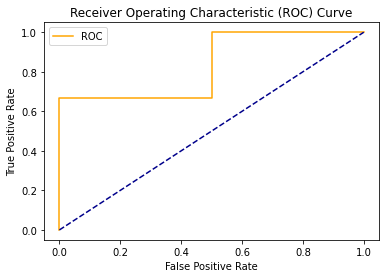

In [45]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

y_true = np.array([0,0, 1, 1,1])
y_scores = np.array([0.0,0.09, .05, .75,1])

fpr, tpr, thresholds = roc_curve(y_true, y_scores)
print(tpr)
print(fpr)
print(thresholds)
print(roc_auc_score(y_true, y_scores))
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print("Threshold value is:", optimal_threshold)
plot_roc_curve(fpr, tpr)

In [49]:
json_data = {"columns" : list(column_names)}

In [50]:
#pickle file

with open("diabetis_model.pkl", "wb") as f :
    pickle.dump(model, f)

In [51]:
#project data

import json
with open("diabetes_data.json" , "w") as f:
    json.dump(json_data, f)

In [59]:
class LogisticRegressionWithThreshold(LogisticRegression):
    def predict(self, X, threshold=None):
        if threshold == None: # If no threshold passed in, simply call the base class predict, effectively threshold=0.5
            return LogisticRegression.predict(self, X)
        else:
            y_scores = LogisticRegression.predict_proba(self, X)[:, 1]
            y_pred_with_threshold = (y_scores >= threshold).astype(int)

            return y_pred_with_threshold
    
    def threshold_from_optimal_tpr_minus_fpr(self, X, y):
        y_scores = LogisticRegression.predict_proba(self, X)[:, 1]
        fpr, tpr, thresholds = roc_curve(y, y_scores) 

        optimal_idx = np.argmax(tpr - fpr)

        return thresholds[optimal_idx], tpr[optimal_idx] - fpr[optimal_idx]

In [65]:
lrt = LogisticRegressionWithThreshold()
lrt.fit(x_train, y_train)

threshold, optimal_tpr_minus_fpr = lrt.threshold_from_optimal_tpr_minus_fpr(x_train, y_train)
y_pred = lrt.predict(x_train, threshold)

threshold, optimal_tpr_minus_fpr

(0.3450316678638458, 0.5410280373831776)

In [66]:
def threshold_from_desired_precision(self, X, y, desired_precision=0.9):
        y_scores = LogisticRegression.predict_proba(self, X)[:, 1]
        precisions, recalls, thresholds = precision_recall_curve(y, y_scores)

        desired_precision_idx = np.argmax(precisions >= desired_precision)
        
        return thresholds[desired_precision_idx], recalls[desired_precision_idx]

def threshold_from_desired_recall(self, X, y, desired_recall=0.9):
        y_scores = LogisticRegression.predict_proba(self, X)[:, 1]
        precisions, recalls, thresholds = precision_recall_curve(y, y_scores)

        desired_recall_idx = np.argmin(recalls >= desired_recall)
        
        return thresholds[desired_recall_idx], precisions[desired_recall_idx]

In [68]:
lrt = LogisticRegressionWithThreshold()
lrt.fit(x_train, y_train)

threshold, precision = lrt.threshold_from_desired_recall(x_train, y_train, 0.9)
y_pred = lrt.predict(x_train, threshold)

threshold, precision

AttributeError: 'LogisticRegressionWithThreshold' object has no attribute 'threshold_from_desired_recall'

In [69]:
def threshold_from_optimal_accuracy(self, X, y):
        y_scores = LogisticRegression.predict_proba(self, X)[:, 1]
        precisions, recalls, thresholds = precision_recall_curve(y, y_scores)
        
        accuracies = []
        tns = []
        fps = []
        fns = []
        tps = []

        for threshold in thresholds:
            y_pred_with_threshold = (y_scores >= threshold).astype(int)
            tn, fp, fn, tp = confusion_matrix(y, y_pred_with_threshold).ravel()

            accuracies.append((tp+tn)/(tn+fp+fn+tp))
            tns.append(tn), fps.append(fp), fns.append(fn), tps.append(tp)
        
        df_accuracy = pd.DataFrame({'threshold':thresholds, 'accuracy':accuracies, 'tn':tns, 'fp':fps, 'fn':fns, 'tp':tps})

        max_accuracy = df_accuracy['accuracy'].max()
        threshold = df_accuracy[df_accuracy['accuracy']==max_accuracy].iloc[0]['threshold']

        return threshold, max_accuracy, df_accuracy

In [71]:
lrt = LogisticRegressionWithThreshold()
lrt.fit(x_train, y_train)

threshold, max_accuracy, df_accuracy = lrt.threshold_from_optimal_accuracy(x_train, y_train)
y_pred = lrt.predict(x_train, threshold)

threshold, max_accuracy

AttributeError: 'LogisticRegressionWithThreshold' object has no attribute 'threshold_from_optimal_accuracy'

In [ ]:

import pickle
import json
import pandas as pd 
import numpy as np
import config 

class Diabetis():
    def __init__(self,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age):
        self.Pregnancies=Pregnancies
        self.Glucose=Glucose
        self.BloodPressure=BloodPressure
        self.SkinThickness=SkinThickness
        self.Insulin=Insulin
        self.BMI=BMI
        self.DiabetesPedigreeFunction=DiabetesPedigreeFunction
        self.Age=Age

        

    def load_model(self):
        with open(config.Model_file_path,"rb") as f:
            self.model=pickle.load(f)

        with open(config.Json_file_path,"r") as f:
            self.json_data=json.load(f)

    def predict_diabetis(self):
        self.load_model()

        len(self.json_data["columns"])

        array = np.zeros(len(self.json_data["columns"]))
        array[0] = self.Pregnancies
        array[1] = self.Glucose
        array[2] = self.BloodPressure
        array[3] = self.SkinThickness
        array[4] = self.Insulin
        array[5] = self.BMI
        array[6] = self.DiabetesPedigreeFunction
        array[7] = self.Age

        print("test array ---",array)
        predict_patient =self.model.predict([array])[0]
        if predict_patient == 1 :
                print("You are Diabetis patient,Take proper treatment and get recover soon")
        else:
                print("You dont have diabetis ...Enjoy your life")
        
if __name__ == "__main__":
    Pregnancies=7.000
    Glucose=142.000
    BloodPressure=60.000
    SkinThickness=33.000
    Insulin=190.000
    BMI=28.800
    DiabetesPedigreeFunction=0.687
    Age=61.000


    dia = Diabetis(Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age)
    predict_patient=dia.predict_diabetis()
    # if predict_patient == 1 :
    #             print("You are Diabetis patient,Take proper treatment and get recover soon")
    # else:
    #             print("You dont have diabetis ...Enjoy your life")

In [ ]:

from flask import Flask, jsonify, render_template, request
from model.utils import Diabetis
from distutils.command.config import config
import config

app = Flask(__name__)

@app.route('/')
def hello_flask():
    print("********  Your Health  Our Responsibility  *********")
    return render_template("index.html")

@app.route('/predict_diabetes', methods = ["POST", "GET"])
def predict_diabetis():

    if request.method == "GET":
        print("We are using GET Method")
       
        
        Pregnancies = eval(request.args.get("Pregnancies"))
        Glucose = eval(request.args.get("Glucose"))
        BloodPressure = eval(request.args.get("BloodPressure"))
        SkinThickness = eval(request.args.get("SkinThickness"))
        Insulin = eval(request.args.get("Insulin"))
        BMI = eval(request.args.get("BMI"))
        DiabetesPedigreeFunction = eval(request.args.get("DiabetesPedigreeFunction"))
        Age = eval(request.args.get("Age"))
        


        dia = Diabetis(Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age)
        predict_patient=dia.predict_diabetis()
        # if predict_patient == 1 :
        #         print("You are Diabetis patient,Take proper treatment and get recover soon")
        # else:
        #         print("You dont have diabetis ...Enjoy your life"
        

        # return render_template("index.html", prediction = predict_patient)
        if predict_patient == 1:
                return render_template("index.html", prediction = "You are Diabetis patient,Take proper treatment and get recover soon")
        else:
                return render_template("index.html", prediction = "You dont have diabetis ...Enjoy your life...")

    else:
        print("We are using POST Method")

        Pregnancies = eval(request.form.get("Pregnancies"))
        Glucose = eval(request.form.get("Glucose"))
        BloodPressure = eval(request.form.get("BloodPressure"))
        SkinThickness = eval(request.form.get("SkinThickness"))
        Insulin = eval(request.form.get("Insulin"))
        BMI = eval(request.args.get("BMI"))
        DiabetesPedigreeFunction = eval(request.form.get("DiabetesPedigreeFunction"))
        Age = eval(request.form.get("Age"))


        dia = Diabetis(Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age)
        predict_patient=dia.predict_diabetis()

        # return render_template("index.html", prediction = predict_patient)
        if predict_patient == 1:
                return render_template("index.html", prediction = "You are Diabetis patient,Take proper treatment and get recover soon")
        else:
                return render_template("index.html", prediction = "You dont have diabetis ...Enjoy your life...")

    


if __name__ == "__main__":
    app.run(host='0.0.0.0' , port= 7555, debug=True)